In [1]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly
import qutip as qt
from qutip import sigmaz, sigmay, sigmax, tensor, qeye
from scipy import constants as ct
import matplotlib

In [2]:
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': True,
    'width': 600,
    'height': 500,
    # 'opacity': 0.2,
    'xaxis': {
        # 'title': 'Time (\u03BCs)',
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5,
        'tickwidth': 1.5,
        'ticklen': 5,
        'showline': True,
        'showgrid': False,
    },
    'yaxis': {
        # 'title': 'Coherence',
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5,
        'tickwidth': 1.5,
        'ticklen': 5,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
        },
    'font': {
        'family': 'Open Sans',
        'size': 20
    },
    'colorway': ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]
}

In [3]:
mu_b = ct.physical_constants['Bohr magneton in Hz/T'][0]
mu_e = ct.physical_constants['electron mag. mom. to Bohr magneton ratio'][0] * mu_b
mu_n = mu_e / ct.physical_constants['electron mag. mom. to nuclear magneton ratio'][0]

g = ct.physical_constants['electron g factor'][0]

In [4]:
def get_Larmor(B):
    return - g * mu_b * B

In [5]:
B = 1e-1
B_1 = 1e-2
time_list = np.linspace(0, 1e-8, 101)

In [6]:
qt.fock_dm(2, 0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [7]:
omega = get_Larmor(B)
es_com = qt.eseries(0.5 * sigmax(), 1j * omega) + qt.eseries(0.5 * sigmax(), -1j * omega)
H = g * mu_b * B * sigmaz() + g * mu_b * B_1 * es_com
# es_com = qt.essolve(H, qt.basis(2, 0),tlist=time_list, c_op_list=[sigmaz()], e_ops=[sigmaz()])
qt.expect(qt.fock_dm(2, 1), H)

ESERIES object: 1 terms
Hilbert space dimensions: [[1, 1]]
Exponent #0 = 0j
2802495142.4139757

In [8]:
H_expect = qt.expect(sigmaz(), H)
H_expect.value(time_list)

array([-5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -5.60499028e+09, -5.60499028e+09, -5.60499028e+09,
       -5.60499028e+09, -

In [9]:
g_state = qt.basis(2, 0)
e_state = qt.basis(2, 1)
om_0 = get_Larmor(B)
om = get_Larmor(B)
B = 1e-1
B_1 = 1e-3
time_list = np.linspace(0, 1e-6, 1001)

H0 = - 0.5 * g * mu_b * sigmaz()
H1 = sigmax()

def H1_coeff(t, args):
    return -g * mu_b * B_1 * np.cos(om * t)

H = [H0, [H1, H1_coeff]]

In [10]:
get_Larmor(B_1)/1e6

28.024951424139758

In [11]:
output = qt.mesolve(H, g_state, time_list, e_ops=[sigmaz(), sigmax(), sigmay()])

In [12]:
states = output
# states.expect

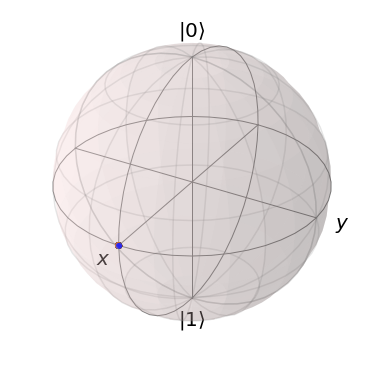

In [13]:
bloch = qt.Bloch()
bloch.add_points(states.expect, 'm')
bloch.show()

In [14]:
exp_fig = go.Figure()
exp_fig.add_scatter(x=time_list, y=states.expect[0], name=r'$\sigma_z$')
exp_fig.add_scatter(x=time_list, y=states.expect[1], name=r'$\sigma_x$')
exp_fig.add_scatter(x=time_list, y=states.expect[2], name=r'$\sigma_y$')

In [15]:
np.exp(sigmax())

array([[1.        +0.j, 2.71828183+0.j],
       [2.71828183+0.j, 1.        +0.j]])

In [40]:
om = get_Larmor(B) * 0.98
time_list = np.linspace(0, 0.25e-6, 126)

In [41]:
H_rot = -0.5 * (om - om_0) * sigmaz() + 0.5 * g * mu_b * B_1 * sigmax()
output = qt.mesolve(H_rot, g_state, time_list)#, e_ops=[sigmaz(), sigmax(), sigmay()])
output_exps = qt.mesolve(H_rot, g_state, time_list, e_ops=[sigmax(), sigmay(), sigmaz()])

In [47]:
from re import template
exp_fig = go.Figure()
exp_fig.add_scatter(x=time_list*1e6, y=output_exps.expect[0], name=r'$\sigma_x$')
exp_fig.add_scatter(x=time_list*1e6, y=output_exps.expect[1], name=r'$\sigma_y$')
exp_fig.add_scatter(x=time_list*1e6, y=output_exps.expect[2], name=r'$\sigma_z$')
exp_fig.update_layout(template=fig_template)
exp_fig.update_yaxes(range=[-1.2, 1.2])

In [48]:
exp_fig.write_image('./Figs/Rabi_offres.pdf')

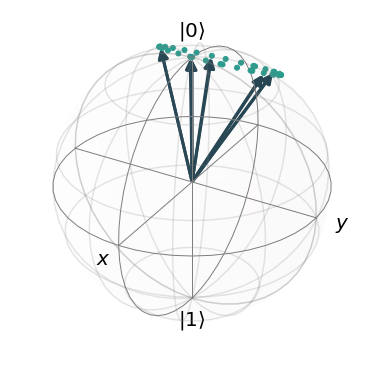

In [43]:
bloch = qt.Bloch()
bloch.add_points([output_exps.expect[0][::4], output_exps.expect[1][::4], output_exps.expect[2][::4]], meth='m')
bloch.add_states(output.states[:-20:10])
bloch.vector_color = ["#264653"]#,"#2a9d8f","#e9c46a","#f4a261","#e76f51"]
bloch.point_color = ["#2a9d8f"]
bloch.sphere_alpha = 0.01
bloch.show()

In [44]:
bloch.save('./Figs/Bloch_offres.pdf', format='pdf')

In [57]:
angle_theta = np.pi/2
angles_phi = [-0.1 * np.pi, -0.05 * np.pi, 0, 0.05 * np.pi, 0.1 * np.pi]

states = []
states_flipped = []

for angle in angles_phi:
    angle = angle + np.pi/2
    state = np.cos(angle_theta / 2) * qt.basis(2, 0) + np.exp(1j * angle) * np.sin(angle_theta/2) * qt.basis(2, 1)
    states.append(state)
    angle = angle + np.pi
    state = np.cos(angle_theta / 2) * qt.basis(2, 0) + np.exp(1j * angle) * np.sin(angle_theta/2) * qt.basis(2, 1)
    states_flipped.append(state)

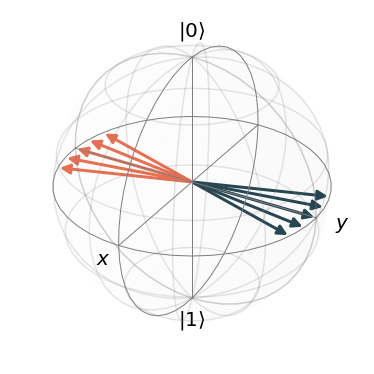

In [67]:
bloch = qt.Bloch()
# bloch.add_points([output_exps.expect[0][::4], output_exps.expect[1][::4], output_exps.expect[2][::4]], meth='m')
bloch.add_states(states)
bloch.add_states(states_flipped)
bloch.vector_color = 5 * ["#264653"] + 5 * ["#e76f51"]#,"#e9c46a","#f4a261","#e76f51"]
bloch.point_color = ["#2a9d8f"]
bloch.sphere_alpha = 0.01
bloch.show()

In [69]:
bloch.save('./Figs/Bloch_single.pdf', format='pdf')

In [70]:
state = (1/np.sqrt(2)) * qt.basis(2, 0) + (1j/np.sqrt(2)) * qt.basis(2, 1)

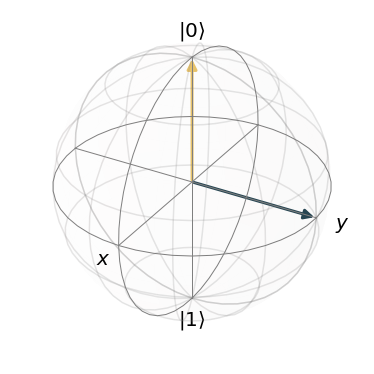

In [78]:
bloch = qt.Bloch()
# bloch.add_points([output_exps.expect[0][::4], output_exps.expect[1][::4], output_exps.expect[2][::4]], meth='m')
bloch.add_states([qt.basis(2, 0), state])
# bloch.add_states(states_flipped)
bloch.vector_color =  ["#264653"] + 5 * ["#e76f51"]#,"#e9c46a","#f4a261","#e76f51"]
bloch.vector_color = ["#e9c46a", "#264653"]
bloch.point_color = ["#2a9d8f"]
bloch.sphere_alpha = 0.01
bloch.show()

In [79]:
bloch.save('./Figs/Bloch_i.pdf', format='pdf')

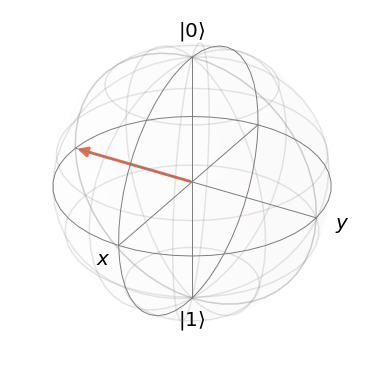

In [80]:
bloch = qt.Bloch()
# bloch.add_points([output_exps.expect[0][::4], output_exps.expect[1][::4], output_exps.expect[2][::4]], meth='m')
bloch.add_states(sigmax() * state)
# bloch.add_states(states_flipped)
bloch.vector_color = 5 * ["#e76f51"]#,"#e9c46a","#f4a261","#e76f51"]
bloch.point_color = ["#2a9d8f"]
bloch.sphere_alpha = 0.01
bloch.show()

In [81]:
bloch.save('./Figs/Bloch-i.pdf', format='pdf')

In [98]:
x = np.linspace(-10, 10, 10001)
y = 1 / (1 + (0.5 * x) ** 2)

In [99]:
fig = go.Figure()
fig.add_scatter(x=x, y=y)
fig.update_layout(template=fig_template)

In [100]:
fig.write_image('./Figs/lorentzian.pdf')